In [1]:
#import library data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
#load data dari local disk
data=pd.read_csv("C:/Users/LENOVO/Downloads/archive (1)/Anemia.csv")
data=data.drop(['BB','BA'],axis=1)
data

,NO,LAB_TEST,RESULT,GENDER,IDENTIFICATION
0,1,Hemoglobin,14.9,Male,Not Anemia
1,1,MCH,22.7,Male,Not Anemia
2,1,MCHC,29.1,Male,Not Anemia
3,1,MCV,83.7,Male,Not Anemia
4,2,Hemoglobin,15.9,Female,Not Anemia
...,...,...,...,...,...
5679,1420,MCV,95.2,Female,Not Anemia
5680,1421,Hemoglobin,11.8,Female,Anemia
5681,1421,MCH,21.2,Female,Anemia
5682,1421,MCHC,28.4,Female,Anemia


In [3]:
#check missing value
np.sum(data.isnull())

NO                0
LAB_TEST          0
RESULT            0
GENDER            0
IDENTIFICATION    0
dtype: int64

In [4]:
#membuat data dengan kolom baru adalah hasil tiap tes
data1=data[data['LAB_TEST']==('Hemoglobin')].reset_index(drop="True")

In [5]:
data1['Hemoglobin']=data[data['LAB_TEST']==('Hemoglobin')]['RESULT'].reset_index(drop="True")
data1['MCH']=data[data['LAB_TEST']==('MCH')]['RESULT'].reset_index(drop="True")
data1['MCHC']=data[data['LAB_TEST']==('MCHC')]['RESULT'].reset_index(drop="True")
data1['MCV']=data[data['LAB_TEST']==('MCV')]['RESULT'].reset_index(drop="True")

In [6]:
#menghapus kolom NO, LAB_TEST, DAN RESULT
data=data1.drop(['NO','LAB_TEST','RESULT'],axis=1)

In [7]:
data

,GENDER,IDENTIFICATION,Hemoglobin,MCH,MCHC,MCV
0,Male,Not Anemia,14.9,22.7,29.1,83.7
1,Female,Not Anemia,15.9,25.4,28.3,72.0
2,Female,Anemia,9.0,21.5,29.6,71.2
3,Female,Not Anemia,14.9,16.0,31.4,87.5
4,Male,Not Anemia,14.7,22.0,28.2,99.5
...,...,...,...,...,...,...
1416,Female,Anemia,10.6,25.4,28.2,82.9
1417,Male,Anemia,12.1,28.3,30.4,86.9
1418,Male,Anemia,13.1,17.7,28.1,80.7
1419,Female,Not Anemia,14.3,16.2,29.5,95.2


In [8]:
#memberi label numerik pada data kategorik
labelencoder=LabelEncoder()
data['GENDER']=labelencoder.fit_transform(data['GENDER'])
data['IDENTIFICATION']=labelencoder.fit_transform(data['IDENTIFICATION'])
data

,GENDER,IDENTIFICATION,Hemoglobin,MCH,MCHC,MCV
0,1,1,14.9,22.7,29.1,83.7
1,0,1,15.9,25.4,28.3,72.0
2,0,0,9.0,21.5,29.6,71.2
3,0,1,14.9,16.0,31.4,87.5
4,1,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...,...
1416,0,0,10.6,25.4,28.2,82.9
1417,1,0,12.1,28.3,30.4,86.9
1418,1,0,13.1,17.7,28.1,80.7
1419,0,1,14.3,16.2,29.5,95.2


In [9]:
#definisikan data target dan prediktor
y=data['IDENTIFICATION']
x=data.drop(['IDENTIFICATION'], axis=1)

In [10]:
#split data training dan testing
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [11]:
#definisikan model menggunakan SVM
model = svm.SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train) 

SVC(gamma='auto')

In [12]:
#model prediksi
y_pred = model.predict(X_test)
y_pred[0:5]

array([1, 1, 1, 0, 0])

In [13]:
#definisikan fungsi untuk membuat plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       130
           1       0.97      0.97      0.97       155

    accuracy                           0.97       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285

Confusion matrix, without normalization
[[125   5]
 [  4 151]]


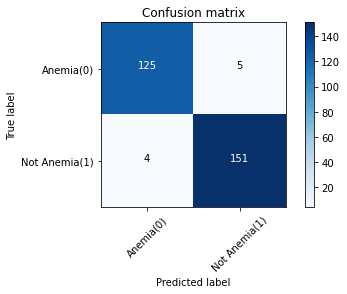

In [14]:
#melihat ketepatan model klasifikasi
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

#memanggil plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Anemia(0)','Not Anemia(1)'],normalize= False,  title='Confusion matrix')

In [15]:
#panggil library untuk save and load model
import pickle
import os

In [16]:
#save model as pickle dengan mode write
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [17]:
os.listdir()
['model.pickle']

['model.pickle']

In [18]:
#load model
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

In [20]:
# import semua functions dari tkinter
from tkinter import *

# definisikan fungsi clear untuk mereset input
def clear_all() :
    gender_field.delete(0, END)
    hemoglobin_field.delete(0, END)
    mch_field.delete(0, END)
    mchc_field.delete(0, END)
    mcv_field.delete(0, END)
    result_field.delete(0, END)
    gender_field.focus_set()

    
# definisikan fungsi menghitung result dan exceptionnya
def calculate_ci():
    gender = (gender_field.get())
    gender=gender.upper()
    if gender==('MALE') or gender==('LAKI-LAKI') or gender==('PRIA'):
        gender=1
    elif gender==('FEMALE') or gender==('PEREMPUAN') or gender==('WANITA'):
        gender=0
    else:
        gender=("error")
    try:
        gender = (gender_field.get())
        gender=gender.upper()
        if gender==('MALE') or gender==('LAKI-LAKI') or gender==('PRIA'):
            gender=1
        elif gender==('FEMALE') or gender==('PEREMPUAN') or gender==('WANITA'):
            gender=0
        else:
            gender=("error")
        hemoglobin = (hemoglobin_field.get())
        mch = (mch_field.get())
        mchc = (mchc_field.get())
        mcv = (mcv_field.get())
        hemoglobin=float(hemoglobin.replace(',', '.'))
        mch=float(mch.replace(',', '.'))
        mchc=float(mchc.replace(',', '.'))
        mcv=float(mcv.replace(',', '.'))
        if 6.6<=hemoglobin<=16.9 and 16<=mch<=30 and 27.8<=mchc<=32.5 and 69.4<=mcv<=101.6:
            pass
        else:
            raise Exception
        hasil=int(model.predict([[gender, hemoglobin, mch, mchc, mcv]]))
        if hasil==1:
            result=("Not Anemia")
        else:
            result=("Anemia")
        result_field.insert(10, result)
    except ValueError:
        result_field.insert(10,"Format tidak sesuai")
    except:
        result_field.insert(10,"Hasil tes out of range")
    
# definisikan fungsi tampilan interface
if __name__ == "__main__" :
    root = Tk()
    root.configure(background = 'light green')
    root.geometry("530x350")
    root.title("Anemia Program Checkup")
    # buat label yang akan ditampilkan
    label1 = Label(root, text = "Jenis kelamin : ",fg = 'black', bg = 'red')
    label2 = Label(root, text = "Hasil tes Hemoglobin : ",fg = 'black', bg = 'red')
    label3 = Label(root, text = "Hasil tes MCH : ",fg = 'black', bg = 'red')
    label4 = Label(root, text = "Hasil tes MCHC : ",fg = 'black', bg = 'red')
    label5 = Label(root, text = "Hasil tes MCV : ",fg = 'black', bg = 'red')
    label6 = Label(root, text = "Potensi anemia : ",fg = 'black', bg = 'red')
    label11 = Label(root, text = "# male/laki-laki/pria dan sebaliknya",fg = 'blue', bg='light green')
    label21 = Label(root, text = "# berada dalam interval {6.6 - 16.9}",fg = 'blue', bg ='light green')
    label31 = Label(root, text = "# berada dalam interval {16 - 30}",fg = 'blue', bg ='light green')
    label41 = Label(root, text = "# berada dalam interval {27.8 - 32.5}",fg = 'blue', bg ='light green')
    label51 = Label(root, text = "# berada dalam interval {69.4 - 101.6}",fg = 'blue', bg ='light green')
    
    # buat grid/box tempat label
    label1.grid(row = 1, column = 0, padx = 10, pady = 10)
    label2.grid(row = 2, column = 0, padx = 10, pady = 10)
    label3.grid(row = 3, column = 0, padx = 10, pady = 10)
    label4.grid(row = 4, column = 0, padx = 10, pady = 10)
    label5.grid(row = 5, column = 0, padx = 10, pady = 10)
    label6.grid(row = 7, column = 0, padx = 10, pady = 10)
    label11.grid(row = 1, column = 2, padx = 10, pady = 10)
    label21.grid(row = 2, column = 2, padx = 10, pady = 10)
    label31.grid(row = 3, column = 2, padx = 10, pady = 10)
    label41.grid(row = 4, column = 2, padx = 10, pady = 10)
    label51.grid(row = 5, column = 2, padx = 10, pady = 10)
    
    # fungsi agar dapat melakukan entry pada input box
    gender_field = Entry(root)
    hemoglobin_field = Entry(root)
    mch_field=Entry(root)
    mchc_field=Entry(root)
    mcv_field=Entry(root)
    result_field=Entry(root)
    
    # buat input box
    gender_field.grid(row = 1, column = 1, padx = 10, pady = 10)
    hemoglobin_field.grid(row = 2, column = 1, padx = 10, pady = 10)
    mch_field.grid(row = 3, column = 1, padx = 10, pady = 10)
    mchc_field.grid(row = 4, column = 1, padx = 10, pady = 10)
    mcv_field.grid(row = 5, column = 1, padx = 10, pady = 10)
    result_field.grid(row = 7, column = 1, padx = 10, pady = 10)
    
    # buat tombol submit dan clear untuk menampilkan result dan mereset input
    button1 = Button(root, text = "Submit", bg = "red",fg = "black", command = calculate_ci)
    button2 = Button(root, text = "Clear", bg = "red",fg = "black", command = clear_all)

    button1.grid(row = 6, column = 1, pady = 10)
    button2.grid(row = 8, column = 1, pady = 10)

    # Start the GUI
    root.mainloop()
